# Описание задания

**Цель лабораторной работы:** изучение различных методов визуализация данных.

**Задание:**
* Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для лабораторных работ не рекомендуется выбирать датасеты большого размера.
* Создать ноутбук, который содержит следующие разделы:

  1)  Текстовое описание выбранного Вами набора данных.

  2)  Основные характеристики датасета.

  3)  Визуальное исследование датасета.

  4)  Информация о корреляции признаков.

* Сформировать отчет и разместить его в своем репозитории на github.

# Ход выполнения лабораторной работы

## 1. Текстовое описание выбранного набора данных.

Датасет представляет собой набор оценок, полученных студентами высшей школы на тестах в США по различным предметам.

## 2. Основные характеристики датасета.

Категориальные характеристики:

*   gender - пол
*   race/ethnicity - раса/этническая принадлежность
*   parental level of education - уровень образования родителей
*   lunch - тип обеда, покупаемого студентом
*   test preparation course - прохождение студентом специального курса по подготовке к тесту

Количественные характеристики:
*   math score - количество баллов по математике (максимум 100)
*   reading score - количество баллов по литературе (максимум 100)
*   writing score - количество баллов по письму (максимум 100)






## 3. Визуальное исследование датасета.

### Загрузка данных из Google Drive

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

In [0]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "title='StudentsPerformance.csv'"}).GetList()

In [7]:
for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: StudentsPerformance.csv, id: 1--kPVRX5KpOLhIJi5Gj7jyEo13eEZ_q3
downloading to /root/data/StudentsPerformance.csv


### Определение основных характеристик датасета


In [0]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
data = pd.read_csv(fname, sep=",")

In [0]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:

total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1000


In [0]:
# Список колонок с типами данных
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [0]:
# Проверка наличия пустых значений
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

gender - 0
race/ethnicity - 0
parental level of education - 0
lunch - 0
test preparation course - 0
math score - 0
reading score - 0
writing score - 0


In [0]:
# Основные статистические характеристки набора данных
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [0]:
# Выделим категориальные признаки
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
# Для каждого выделим его возможные значения
for сol in categorical_columns:
  print(сol + ": ", end="|")
  for unique_val in data[сol].unique():
    print(unique_val, end="|")
  print()

gender: |female|male|
race/ethnicity: |group B|group C|group A|group D|group E|
parental level of education: |bachelor's degree|some college|master's degree|associate's degree|high school|some high school|
lunch: |standard|free/reduced|
test preparation course: |none|completed|


### Диаграммы рассеяния

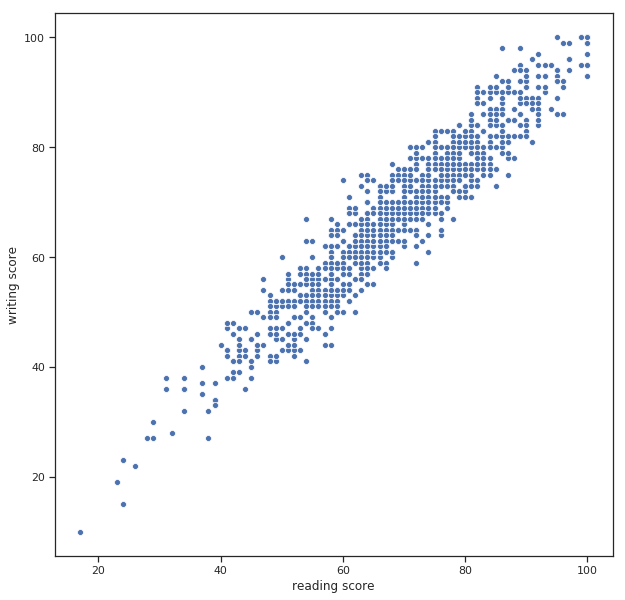

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='reading score', y='writing score', data=data)

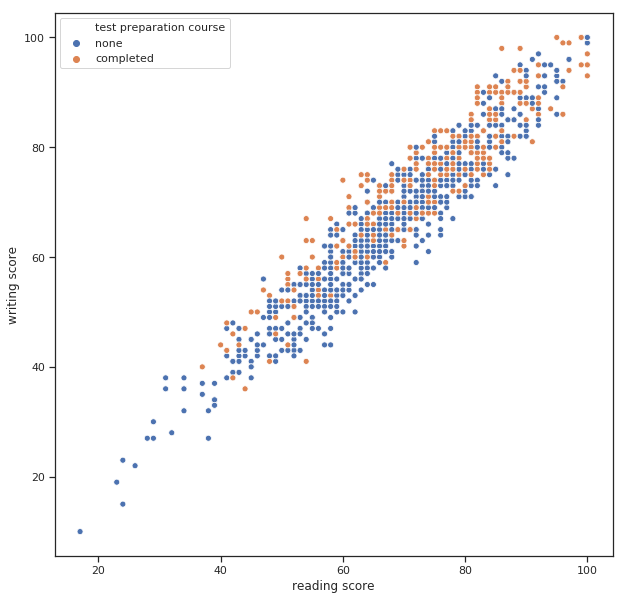

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='reading score', y='writing score', data=data, hue='test preparation course')

### Гистограмма

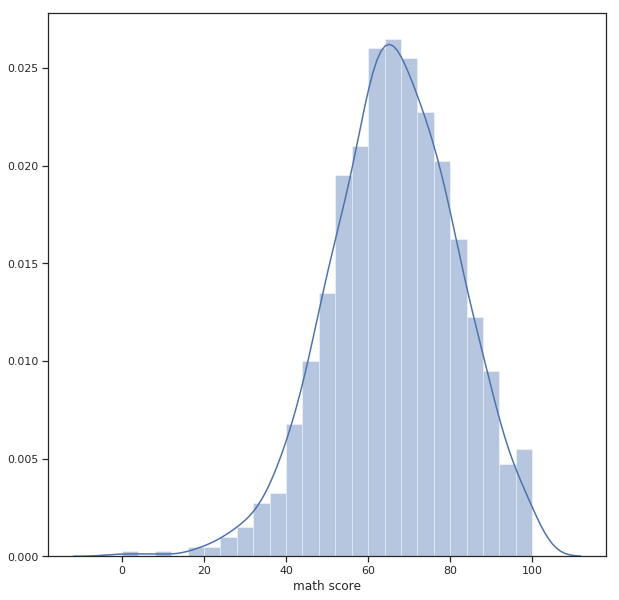

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['math score'])

### Jointplot

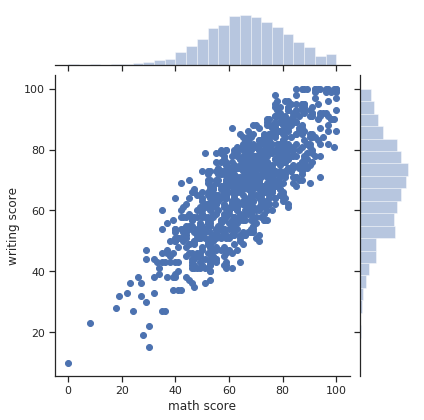

In [0]:
sns.jointplot(x='math score', y='writing score', data=data)

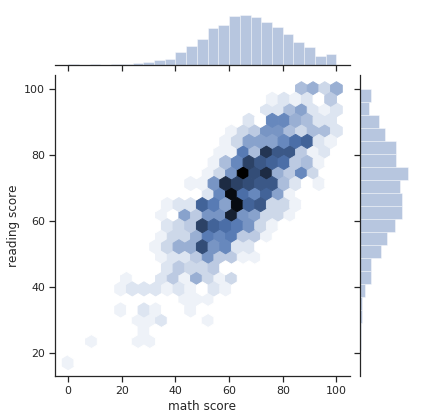

In [0]:
sns.jointplot(x='math score', y='reading score', data=data, kind="hex")

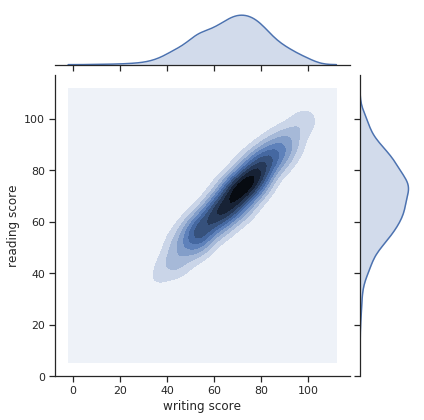

In [0]:
sns.jointplot(x='writing score', y='reading score', data=data, kind="kde")

### Парные диаграммы

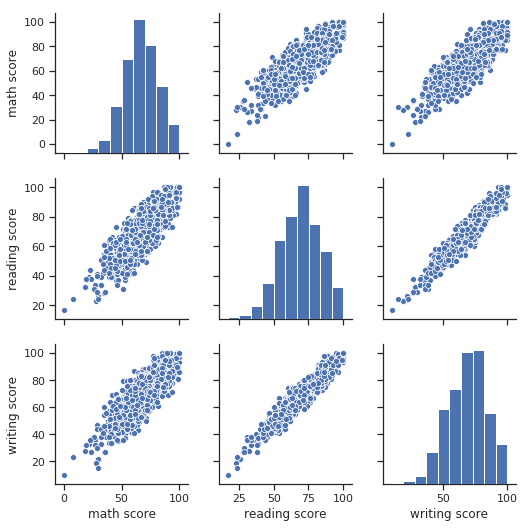

In [0]:
sns.pairplot(data)

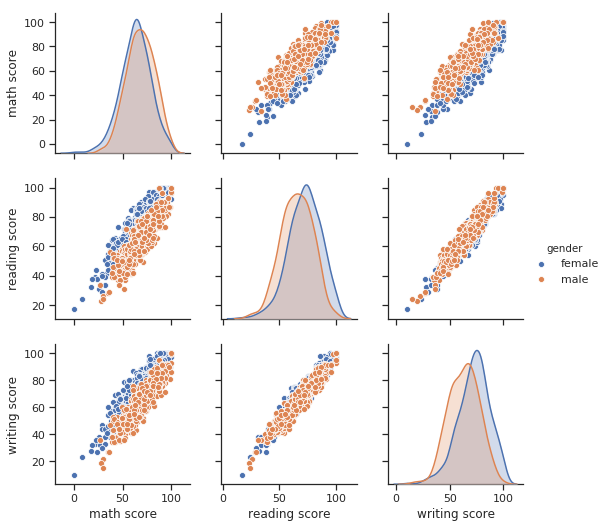

In [0]:
sns.pairplot(data, hue="gender")

### "Ящик с усами"

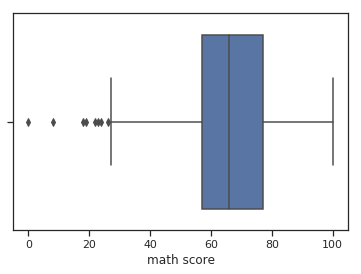

In [0]:
sns.boxplot(x=data['math score'])

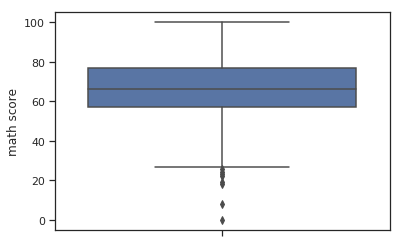

In [0]:
sns.boxplot(y=data['math score'])

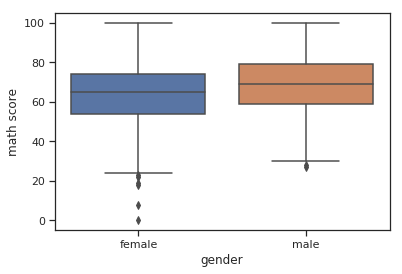

In [0]:
sns.boxplot(x='gender', y='math score', data=data)

### ViolinPlot
*"Ящик с усами + распределение плотности"*

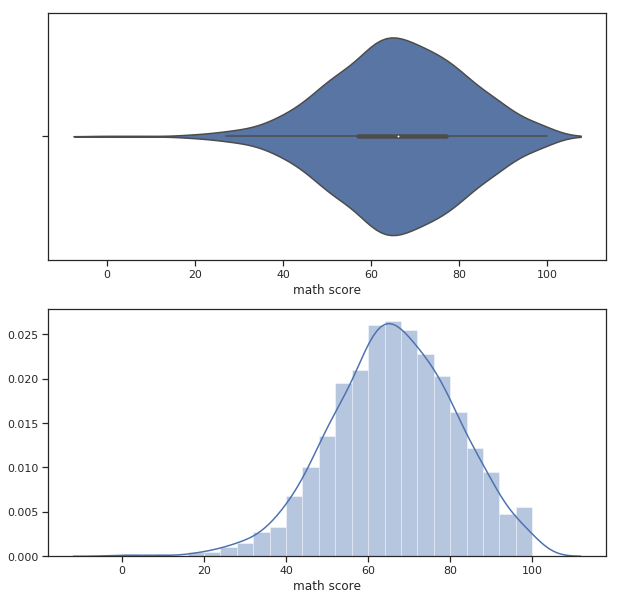

In [0]:
fig, ax =  plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['math score'])
sns.distplot(data['math score'], ax=ax[1])

## 4. Информация о корреляции признаков.

### Корреляционные матрицы

In [0]:
data.corr(method='pearson')

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [0]:
data.corr(method='kendall')

,math score,reading score,writing score
math score,1.000000,0.617432,0.591067
reading score,0.617432,1.000000,0.820058
writing score,0.591067,0.820058,1.000000


In [0]:
data.corr(method='spearman')

,math score,reading score,writing score
math score,1.000000,0.804064,0.778339
reading score,0.804064,1.000000,0.948953
writing score,0.778339,0.948953,1.000000


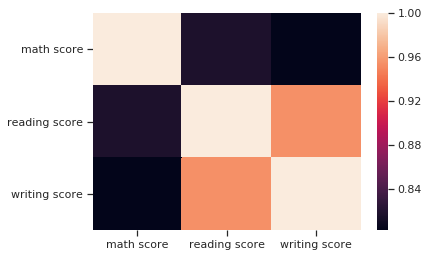

In [0]:
sns.heatmap(data.corr())

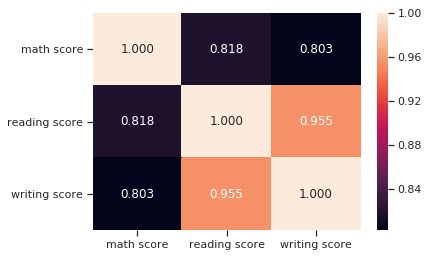

In [0]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

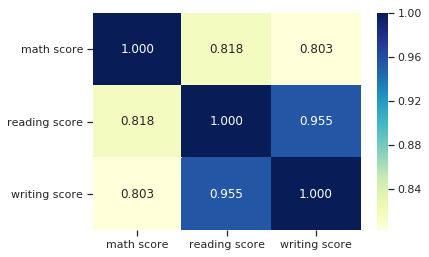

In [0]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

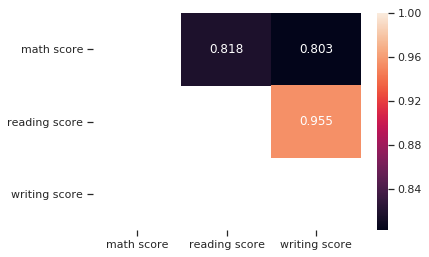

In [0]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

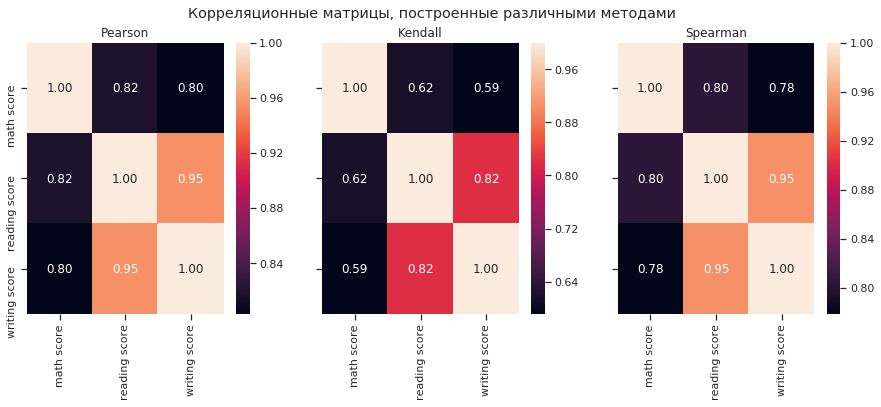

In [0]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')